### Linear Algebra, Calculus, and Gradient Descent

#### Objectives
* Use operations with vectors and matrices to solve systems of linear equations
* Identify and describe of scalars, vectors,  matrices, using appropriate mathematical jargon
* Set up and solve systems of linear equations with real life examples
* Describe gradient descent in relation to slope, derivatives, and step size


## Why Linear Algebra?

Linear Algebra is the basis of many machine learning models.

Data is usually already set up into a matrix by default!

<img src= "./resources/dataset.jpeg">

It can be used to model complicated things like language

<img src = "./resources/Word-Vectors.png">

Important for image compression and recognition

<img src = "./resources/images.gif">

### Group 1: using code to explain vectors and scalars

In [3]:
import numpy as np

<img src="https://github.com/learn-co-students/nyc-mhtn-ds-031119-lectures/raw/404d31eb8d11bc044187c99b487f4f46082e8f3c/Mod_3/LinAlgebra/resources/linal_types.png" width=450>

## Vectors

An array with magnitude and direction. The coordinates of a vector represent where the tip of the vector would be if you travelled from the origin.


Operations with vectores
Assume

$ \vec{v} = \begin{bmatrix}v_{1} \\v_{2}\end{bmatrix} $


$ \vec{w} = \begin{bmatrix}w_{1} \\w_{2}\end{bmatrix} $

$ \vec{v} + \vec{w} = \begin{bmatrix}v_{1} + w_{1} \\v_{2} + w_{2}\end{bmatrix} $

What is happening graphically? Let's look at an example:


In [4]:
import numpy as np
v = np.array([2, 4])
w = np.array([3, 2])
v + w

array([5, 6])

#### Scalars

Have magnitude only. Can be multiplied by a vector or matrix to create a change in **scale** and/or direction.

What scalars would you need to change the direction of a vector?

In [5]:
v * 4

array([ 8, 16])

### Group 2: Desmos to explore vectors and scalars

[link to fun desmos interaction](https://www.desmos.com/calculator/yovo2ro9me)

To capture the relationship between (*a, b*), to capture the _direction_ rather than the length, what mathematical concept would you use?

### Group 3: Youtube vid

[Link to good video on scalars and vectors](https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)

## Slide break!

[Gradient slide](https://www.youtube.com/watch?v=vWFjqgb-ylQ)

**Good video on details of gradient decent**

https://www.youtube.com/watch?v=sDv4f4s2SB8

### Gradient Descent


[slide deck!](https://docs.google.com/presentation/d/1i7FTqyjxWESFVYe6T5BYDzmqq0x7rI2c0va1Tn6WxbM/edit?usp=sharing)

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [7]:
numPoints=10
np.zeros(shape=numPoints)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [9]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 25)
m, n = np.shape(x)

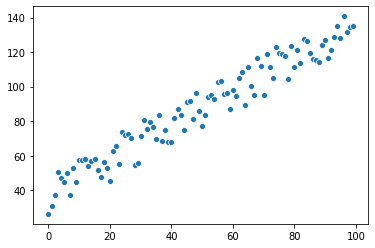

In [10]:
sns.scatterplot(x=x[:, 1], y=y)

In [11]:
x
theta = np.array([1.90595185,1.5342646])
np.dot(x, theta)

array([  1.90595185,   3.44021645,   4.97448105,   6.50874565,
         8.04301025,   9.57727485,  11.11153945,  12.64580405,
        14.18006865,  15.71433325,  17.24859785,  18.78286245,
        20.31712705,  21.85139165,  23.38565625,  24.91992085,
        26.45418545,  27.98845005,  29.52271465,  31.05697925,
        32.59124385,  34.12550845,  35.65977305,  37.19403765,
        38.72830225,  40.26256685,  41.79683145,  43.33109605,
        44.86536065,  46.39962525,  47.93388985,  49.46815445,
        51.00241905,  52.53668365,  54.07094825,  55.60521285,
        57.13947745,  58.67374205,  60.20800665,  61.74227125,
        63.27653585,  64.81080045,  66.34506505,  67.87932965,
        69.41359425,  70.94785885,  72.48212345,  74.01638805,
        75.55065265,  77.08491725,  78.61918185,  80.15344645,
        81.68771105,  83.22197565,  84.75624025,  86.29050485,
        87.82476945,  89.35903405,  90.89329865,  92.42756325,
        93.96182785,  95.49609245,  97.03035705,  98.56

In [12]:
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        if i % (numIterations // 40) == 0:
            print("Iteration %d | Cost: %f" % (i, cost))
            print(theta)
        costs.append(cost)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y=costs, x=[i for i in range(len(costs))])

Iteration 0 | Cost: 211.300031
[1.90595185 1.5342646 ]
Iteration 2500 | Cost: 189.069862
[4.26193864 1.50188145]
Iteration 5000 | Cost: 169.502439
[6.47308477 1.46854502]
Iteration 7500 | Cost: 152.266289
[8.54833635 1.4372574 ]
Iteration 10000 | Cost: 137.083663
[10.49604531  1.40789268]
Iteration 12500 | Cost: 123.709904
[12.32405028  1.38033269]
Iteration 15000 | Cost: 111.929502
[14.03970813  1.3544665 ]
Iteration 17500 | Cost: 101.552623
[15.64992358  1.33019002]
Iteration 20000 | Cost: 92.412051
[17.16117701  1.30740555]
Iteration 22500 | Cost: 84.360492
[18.57955051  1.28602138]
Iteration 25000 | Cost: 77.268201
[19.91075238  1.26595146]
Iteration 27500 | Cost: 71.020888
[21.16014008  1.24711501]
Iteration 30000 | Cost: 65.517884
[22.33274183  1.22943623]
Iteration 32500 | Cost: 60.670511
[23.4332768   1.21284397]
Iteration 35000 | Cost: 56.400657
[24.46617413  1.19727145]
Iteration 37500 | Cost: 52.639515
[25.43559075  1.182656  ]
Iteration 40000 | Cost: 49.326478
[26.34542813 

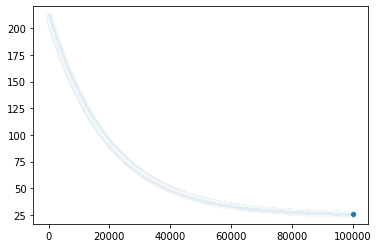

In [13]:
numIterations = 100000
alpha = 0.0001
theta = np.array([1.90595185,1.5342646])
gradientDescent(x, y, theta, alpha, m, numIterations)